___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.
******************

Bir bankanın müşterilerinin detaylarının yer aldığı bir veri setimiz var ve hedef değişken, müşterinin bankadan ayrılıp ayrılmadığını (hesabını kapattığını) veya müşteri olmaya devam edip etmediğini yansıtan ikili bir değişkendir.

Verilen veri kümesindeki özellikler şunlardır:
- **satır numarası:** 1'den 10000'e kadar olan Satır Numaraları.
- **müşteri kimliği:** Her müşteriyi tanımlayan benzersiz bir kimlik.
- **soyadı:** Müşterinin soyadı.
- **kredi puanı:** Kredi puanı, bir tüketicinin kredi itibarını gösteren 300-850 arasında bir sayıdır.
- **coğrafya:** Müşterinin ait olduğu ülke.
- **Cinsiyet:** Müşterinin cinsiyeti: Erkek, Kadın
- **Yaş:** Müşterinin, müşteri olduğu andaki yıl olarak mevcut yaşı.
- **görev süresi:** Müşterinin bankada bulunduğu yıl sayısı.
- **bakiye:** Müşterinin banka bakiyesi.
- **ürün sayısı:** müşterinin kullandığı banka ürünlerinin sayısı.
- **hascrcard:** Banka tarafından müşteriye verilen kredi kartı sayısı.
- **isactivemember:** Müşterinin şirketten ayrıldığı andan önce bankada aktif olup olmadığını gösteren İkili Bayrak ("çıkış" değişkenine kaydedilir)
- **çıkış:** Müşteri bankadaki hesabını kapattıysa ikili bayrak 1 ve müşteri elde tutulduysa 0.

# Import Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables
*********
1. Verilerinizin nasıl göründüğünü görmek için temel adımları uygulayın 
2. Eksik değerleri kontrol edin 
3. Modellemeye uygun olmayan özellikleri bırakın 
4. Histogram, sayım grafiği, ısı haritası gibi temel görselleştirme adımlarını uygulayın 
5. Kategorik değişkenleri kukla değişkenlere dönüştürün

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum().any()

False

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(10000, 14)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [9]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)  

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [11]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

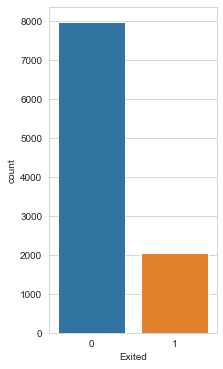

In [12]:
plt.figure(figsize = (3,6))
df["Exited"].value_counts()
sns.countplot(df["Exited"]);

# Imbalance Data!!!

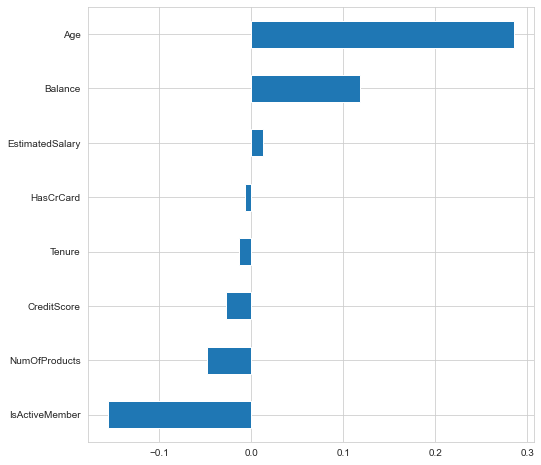

In [13]:
plt.figure(figsize = (8,8))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

# Exited ile diger sütunlarin durumuna bakarsak

In [14]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

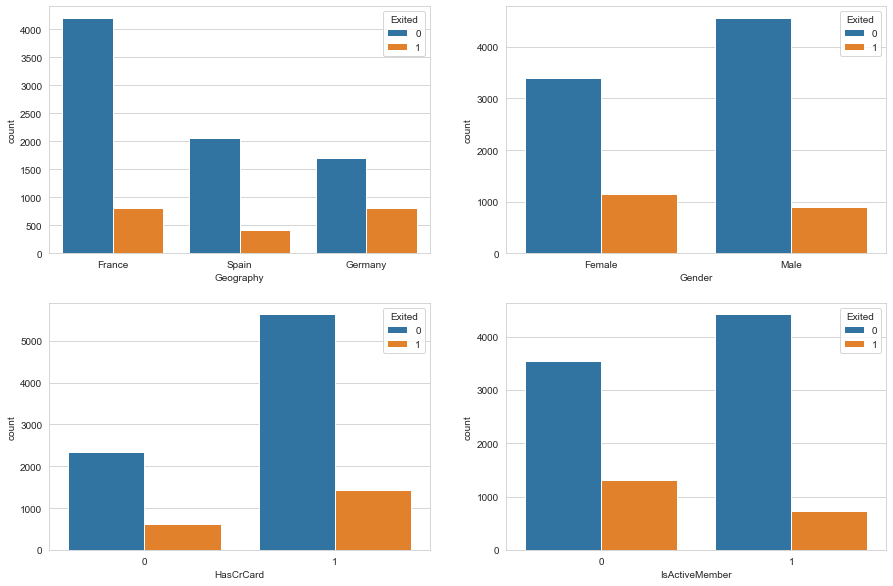

In [15]:
    fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1]);

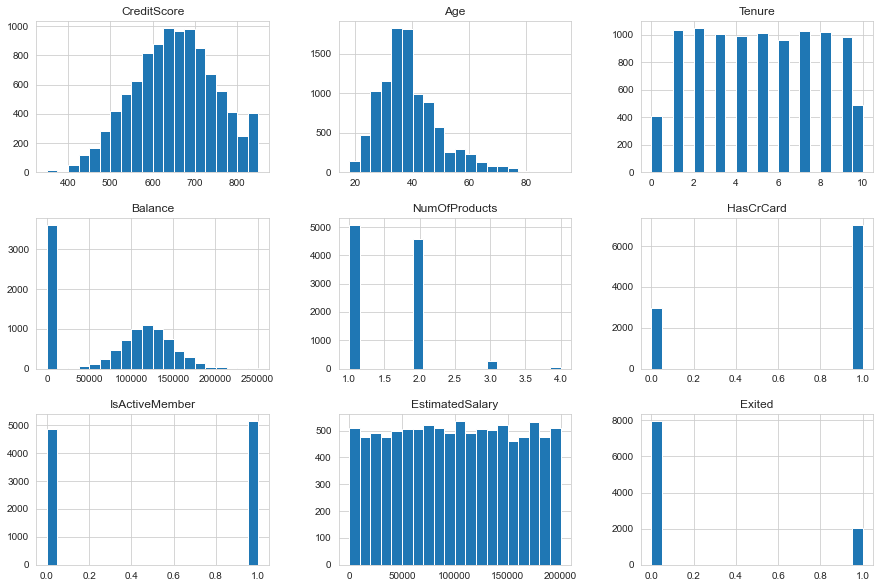

In [16]:
df.hist(figsize=(15, 10), bins=20);

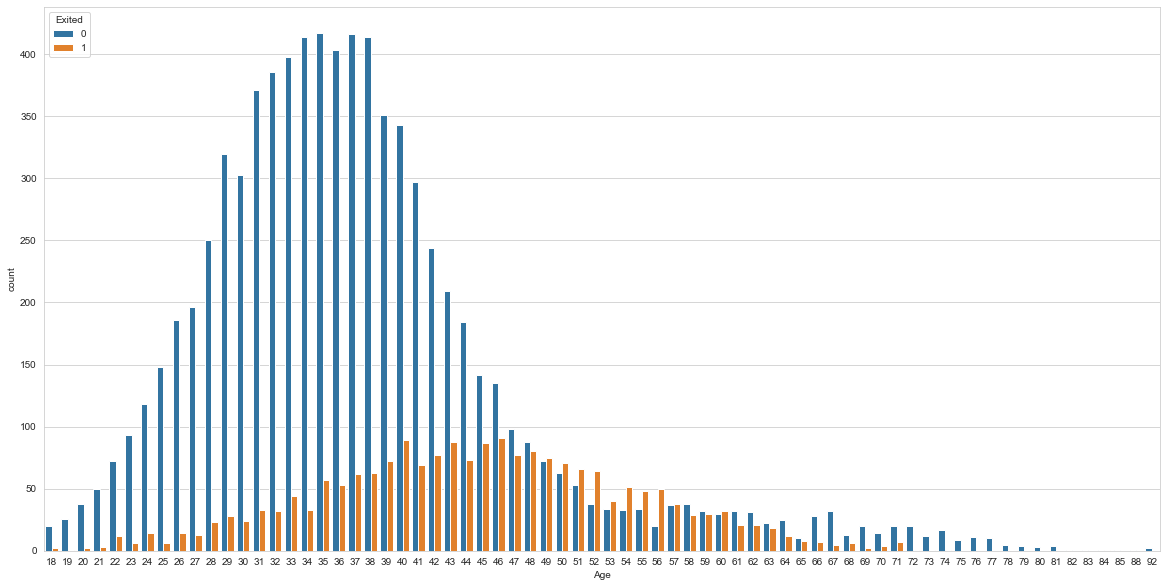

In [17]:
plt.figure(figsize = (20, 10))
sns.countplot(df.Age, hue=df.Exited);

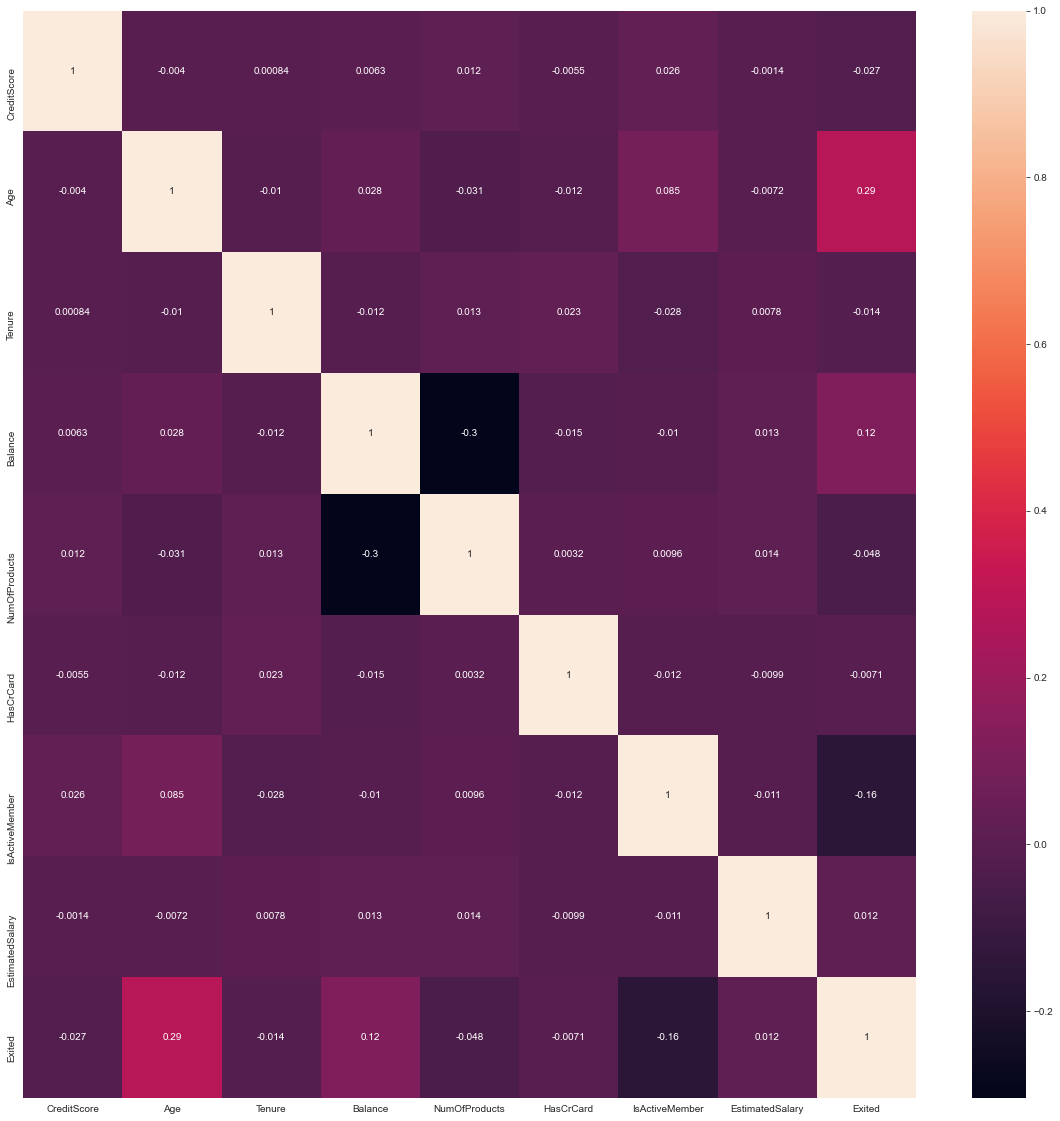

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

# Multicollinearity sorunu yok.

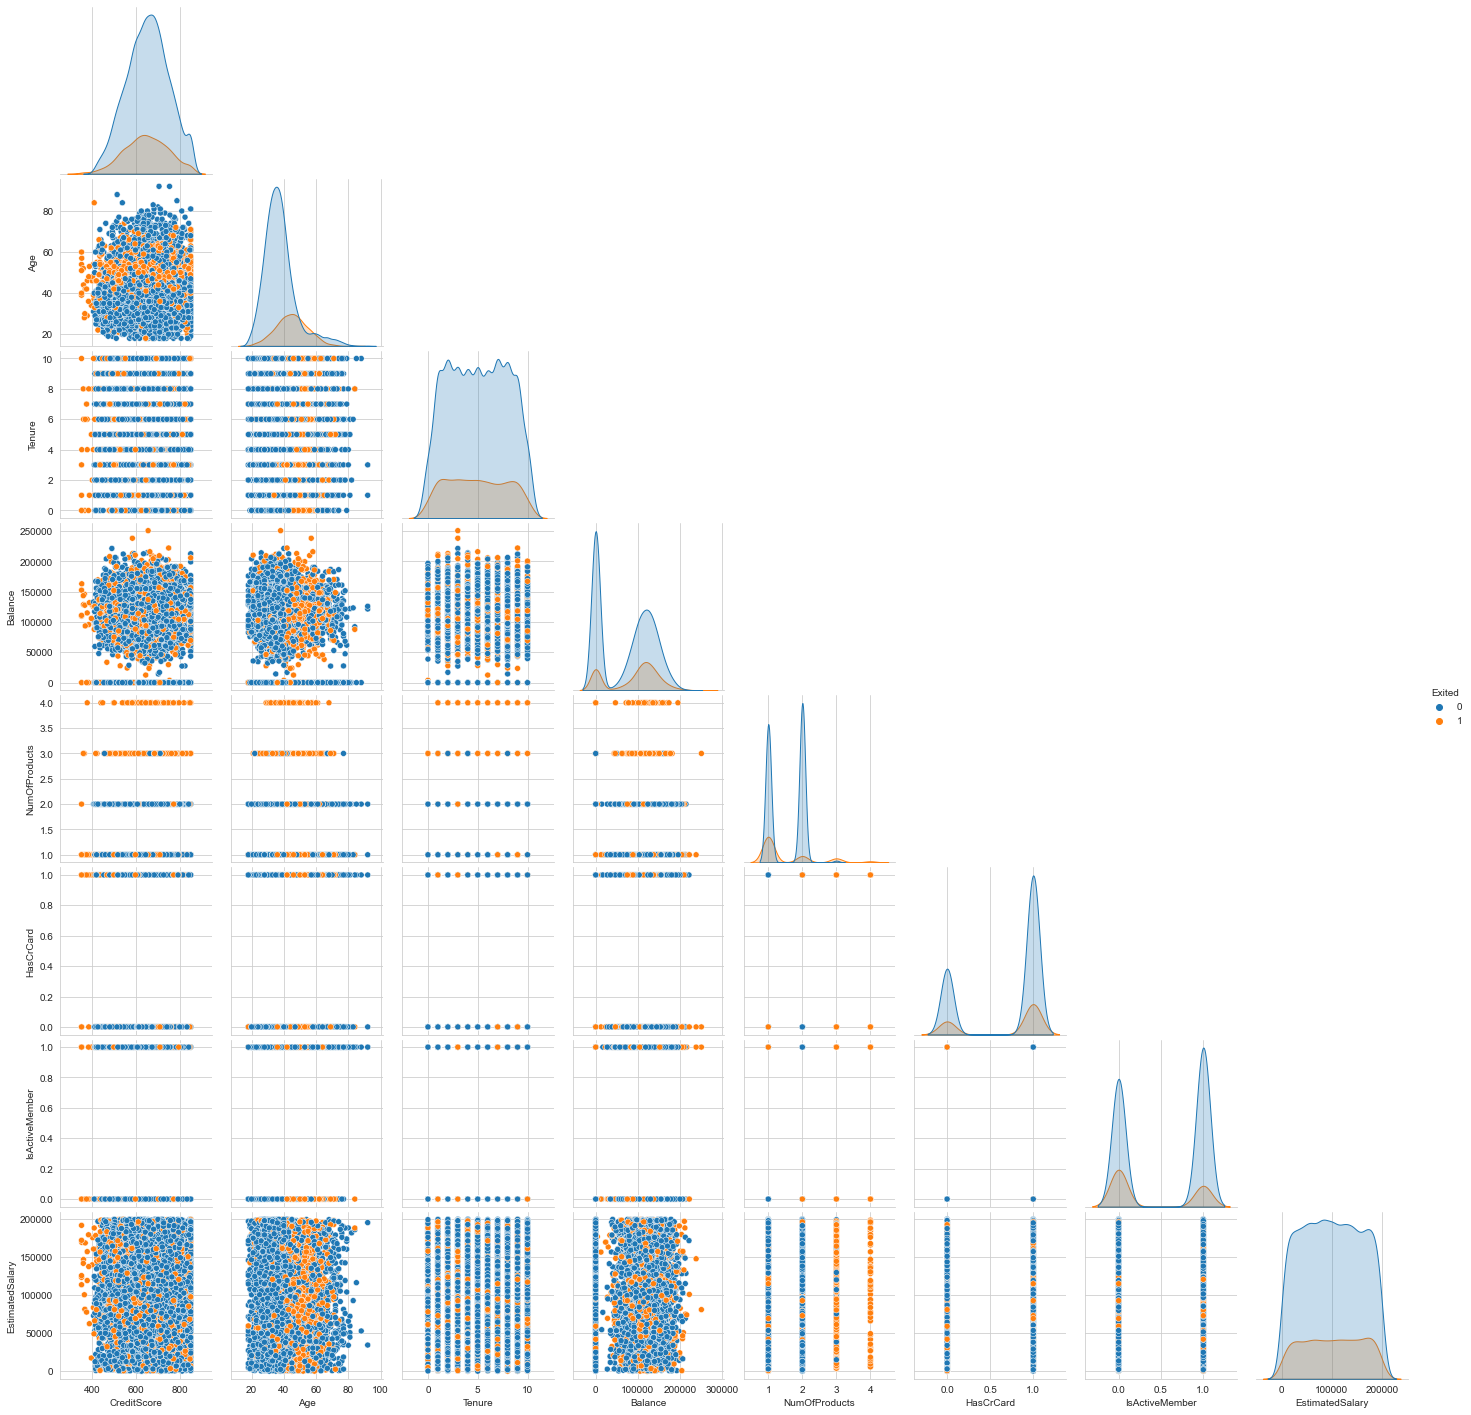

In [19]:
sns.pairplot(df, hue='Exited', corner=True);

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

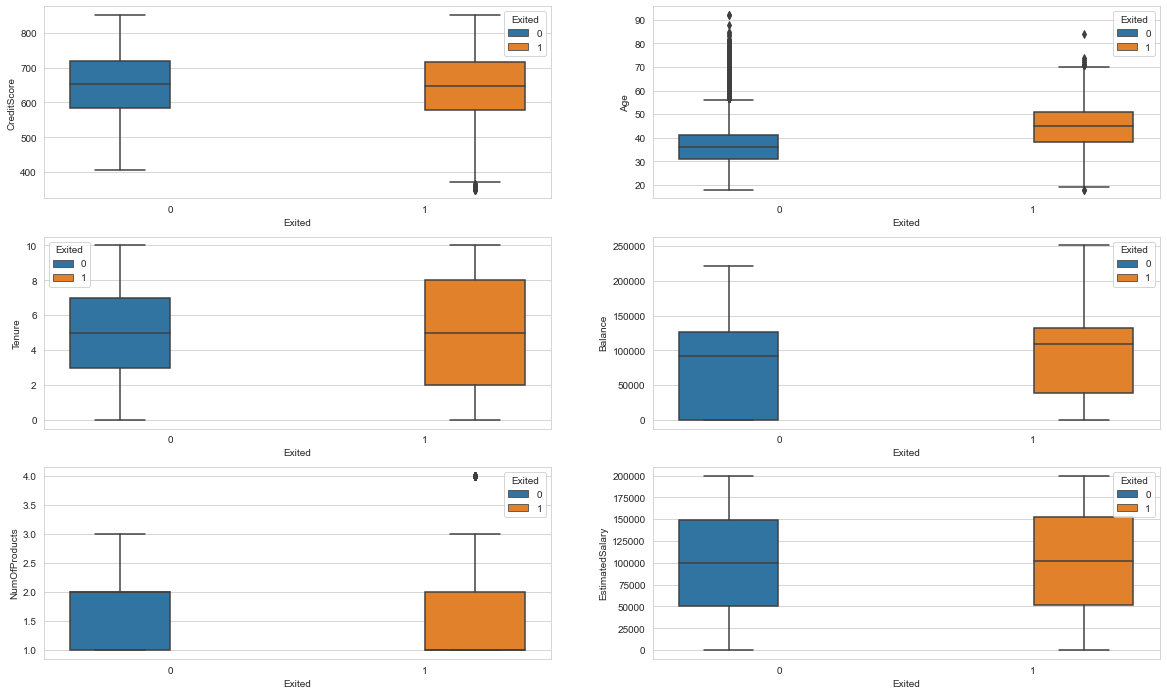

In [20]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited', data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited', data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited', data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited', data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited', data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited', data = df, ax=axarr[2][1])

In [21]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


In [22]:
df.shape

(10000, 12)

# Preprocessing of Data
- Train | Test Split, Scalling
****************
# Verilerin Ön İşlenmesi
- Tren | Test Bölme, Ölçekleme

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [24]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [25]:
seed = 42

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [27]:
scaler = MinMaxScaler()

In [28]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam

In [30]:
X_train.shape, X_test.shape

((9000, 11), (1000, 11))

In [31]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [32]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 250, verbose=1)

Epoch 1/250
64/64 [==============================] - 1s 5ms/step - loss: 0.5754 - recall: 0.0176 - val_loss: 0.4942 - val_recall: 0.0000e+00
Epoch 2/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4858 - recall: 0.0000e+00 - val_loss: 0.4602 - val_recall: 0.0000e+00
Epoch 3/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4640 - recall: 0.0036 - val_loss: 0.4412 - val_recall: 0.0166
Epoch 4/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4513 - recall: 0.0623 - val_loss: 0.4280 - val_recall: 0.1436
Epoch 5/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4419 - recall: 0.1538 - val_loss: 0.4171 - val_recall: 0.1823
Epoch 6/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4326 - recall: 0.1628 - val_loss: 0.4092 - val_recall: 0.1768
Epoch 7/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4256 - recall: 0.2125 - val_loss: 0.3984 - val_recall: 0.2597
Epoch 8/250
64/64 [==========

64/64 [==============================] - 0s 2ms/step - loss: 0.3303 - recall: 0.4722 - val_loss: 0.2881 - val_recall: 0.5635
Epoch 61/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3307 - recall: 0.4746 - val_loss: 0.2908 - val_recall: 0.5967
Epoch 62/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3303 - recall: 0.4794 - val_loss: 0.2903 - val_recall: 0.5856
Epoch 63/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3301 - recall: 0.4740 - val_loss: 0.2879 - val_recall: 0.5856
Epoch 64/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3323 - recall: 0.4806 - val_loss: 0.2895 - val_recall: 0.6354
Epoch 65/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3297 - recall: 0.4722 - val_loss: 0.2891 - val_recall: 0.5525
Epoch 66/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3303 - recall: 0.4879 - val_loss: 0.2914 - val_recall: 0.6077
Epoch 67/250
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3219 - recall: 0.4818 - val_loss: 0.2857 - val_recall: 0.5856
Epoch 120/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3226 - recall: 0.4885 - val_loss: 0.2870 - val_recall: 0.5635
Epoch 121/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3221 - recall: 0.4921 - val_loss: 0.2866 - val_recall: 0.5746
Epoch 122/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3234 - recall: 0.4909 - val_loss: 0.2867 - val_recall: 0.5414
Epoch 123/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3225 - recall: 0.4855 - val_loss: 0.2922 - val_recall: 0.5635
Epoch 124/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3212 - recall: 0.4861 - val_loss: 0.2858 - val_recall: 0.5525
Epoch 125/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3218 - recall: 0.4952 - val_loss: 0.2857 - val_recall: 0.5580
Epoch 126/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3158 - recall: 0.5073 - val_loss: 0.2912 - val_recall: 0.6022
Epoch 179/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3150 - recall: 0.4946 - val_loss: 0.2874 - val_recall: 0.5580
Epoch 180/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3141 - recall: 0.5030 - val_loss: 0.2923 - val_recall: 0.6133
Epoch 181/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3150 - recall: 0.5073 - val_loss: 0.2968 - val_recall: 0.5856
Epoch 182/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3160 - recall: 0.5006 - val_loss: 0.2894 - val_recall: 0.5525
Epoch 183/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3146 - recall: 0.4970 - val_loss: 0.2887 - val_recall: 0.6022
Epoch 184/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3141 - recall: 0.5018 - val_loss: 0.2911 - val_recall: 0.5912
Epoch 185/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3102 - recall: 0.5091 - val_loss: 0.2966 - val_recall: 0.5249
Epoch 238/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3127 - recall: 0.5024 - val_loss: 0.2938 - val_recall: 0.5580
Epoch 239/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3079 - recall: 0.5091 - val_loss: 0.2977 - val_recall: 0.5635
Epoch 240/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3094 - recall: 0.5188 - val_loss: 0.2986 - val_recall: 0.5304
Epoch 241/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3091 - recall: 0.5036 - val_loss: 0.2962 - val_recall: 0.5525
Epoch 242/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3099 - recall: 0.5103 - val_loss: 0.2983 - val_recall: 0.5193
Epoch 243/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3087 - recall: 0.5024 - val_loss: 0.3032 - val_recall: 0.6354
Epoch 244/250
64/64 [====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model
*****************

### Modeli Değerlendirin 
- Metriklerin değişimini gözlemlemek için model geçmişini çizin 
- "Karışıklık matrisi" ve "sınıflandırma raporunu" görmek için tahmin yapın 
- Model için ROC (Alıcı Çalışma Eğrisi) ve AUC'yi (Eğri Altındaki Alan) kontrol edin

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                432       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________


In [34]:
loss_df = pd.DataFrame(model.history.history)

In [35]:
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.575,0.018,0.494,0.000
1,0.486,0.000,0.460,0.000
2,0.464,0.004,0.441,0.017
3,0.451,0.062,0.428,0.144
4,0.442,0.154,0.417,0.182


<AxesSubplot:>

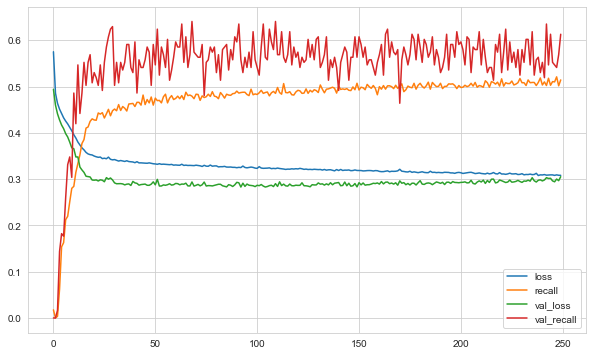

In [36]:
loss_df.plot()

In [37]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Recall degeri cok düsük, kesinlikle imbalance data var.

32/32 [==============================] - 0s 1ms/step
[[743  53]
 [101 103]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       796
           1       0.66      0.50      0.57       204

    accuracy                           0.85      1000
   macro avg       0.77      0.72      0.74      1000
weighted avg       0.84      0.85      0.84      1000



In [38]:
loss, recall= model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.36410051584243774
recall :  0.5049019455909729


#### ROC & AUC for Model - Model icin ROC & AUC

32/32 [==============================] - 0s 1ms/step


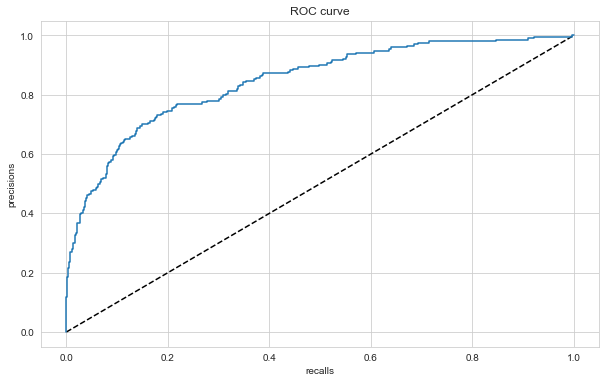

In [39]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precisions, recalls, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('ROC curve')
plt.show()

In [40]:
roc_auc_score(y_test, y_pred_proba)

0.8461301606069563

## with class_weigth

* Investigate how the "class_weight" hyper-parameter is used in a Neural Network.
***************

## sınıf ağırlığı ile 

* Bir Sinir Ağında "sınıf_ağırlığı" hiper parametresinin nasıl kullanıldığını araştırın.

### Create The Model

In [41]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [42]:
from sklearn.utils import class_weight

In [43]:
#from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [44]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 250, verbose=1)

Epoch 1/250
64/64 [==============================] - 1s 5ms/step - loss: 0.5754 - recall: 0.0176 - val_loss: 0.4942 - val_recall: 0.0000e+00
Epoch 2/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4858 - recall: 0.0000e+00 - val_loss: 0.4602 - val_recall: 0.0000e+00
Epoch 3/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4640 - recall: 0.0036 - val_loss: 0.4412 - val_recall: 0.0166
Epoch 4/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4513 - recall: 0.0623 - val_loss: 0.4280 - val_recall: 0.1436
Epoch 5/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4419 - recall: 0.1538 - val_loss: 0.4171 - val_recall: 0.1823
Epoch 6/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4326 - recall: 0.1628 - val_loss: 0.4092 - val_recall: 0.1768
Epoch 7/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4256 - recall: 0.2125 - val_loss: 0.3984 - val_recall: 0.2597
Epoch 8/250
64/64 [==========

64/64 [==============================] - 0s 2ms/step - loss: 0.3303 - recall: 0.4722 - val_loss: 0.2881 - val_recall: 0.5635
Epoch 61/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3307 - recall: 0.4746 - val_loss: 0.2908 - val_recall: 0.5967
Epoch 62/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3303 - recall: 0.4794 - val_loss: 0.2903 - val_recall: 0.5856
Epoch 63/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3301 - recall: 0.4740 - val_loss: 0.2879 - val_recall: 0.5856
Epoch 64/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3323 - recall: 0.4806 - val_loss: 0.2895 - val_recall: 0.6354
Epoch 65/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3297 - recall: 0.4722 - val_loss: 0.2891 - val_recall: 0.5525
Epoch 66/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3303 - recall: 0.4879 - val_loss: 0.2914 - val_recall: 0.6077
Epoch 67/250
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3219 - recall: 0.4818 - val_loss: 0.2857 - val_recall: 0.5856
Epoch 120/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3226 - recall: 0.4885 - val_loss: 0.2870 - val_recall: 0.5635
Epoch 121/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3221 - recall: 0.4921 - val_loss: 0.2866 - val_recall: 0.5746
Epoch 122/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3234 - recall: 0.4909 - val_loss: 0.2867 - val_recall: 0.5414
Epoch 123/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3225 - recall: 0.4855 - val_loss: 0.2922 - val_recall: 0.5635
Epoch 124/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3212 - recall: 0.4861 - val_loss: 0.2858 - val_recall: 0.5525
Epoch 125/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3218 - recall: 0.4952 - val_loss: 0.2857 - val_recall: 0.5580
Epoch 126/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3158 - recall: 0.5073 - val_loss: 0.2912 - val_recall: 0.6022
Epoch 179/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3150 - recall: 0.4946 - val_loss: 0.2874 - val_recall: 0.5580
Epoch 180/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3141 - recall: 0.5030 - val_loss: 0.2923 - val_recall: 0.6133
Epoch 181/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3150 - recall: 0.5073 - val_loss: 0.2968 - val_recall: 0.5856
Epoch 182/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3160 - recall: 0.5006 - val_loss: 0.2894 - val_recall: 0.5525
Epoch 183/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3146 - recall: 0.4970 - val_loss: 0.2887 - val_recall: 0.6022
Epoch 184/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3141 - recall: 0.5018 - val_loss: 0.2911 - val_recall: 0.5912
Epoch 185/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3102 - recall: 0.5091 - val_loss: 0.2966 - val_recall: 0.5249
Epoch 238/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3127 - recall: 0.5024 - val_loss: 0.2938 - val_recall: 0.5580
Epoch 239/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3079 - recall: 0.5091 - val_loss: 0.2977 - val_recall: 0.5635
Epoch 240/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3094 - recall: 0.5188 - val_loss: 0.2986 - val_recall: 0.5304
Epoch 241/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3091 - recall: 0.5036 - val_loss: 0.2962 - val_recall: 0.5525
Epoch 242/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3099 - recall: 0.5103 - val_loss: 0.2983 - val_recall: 0.5193
Epoch 243/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3087 - recall: 0.5024 - val_loss: 0.3032 - val_recall: 0.6354
Epoch 244/250
64/64 [====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model
*******************
### Modeli Değerlendirin

- Metriklerin değişimini gözlemlemek için model geçmişini çizin
- "Karışıklık matrisi" ve "sınıflandırma raporunu" görmek için tahmin yapın
- Model için ROC (Alıcı Çalışma Eğrisi) ve AUC'yi (Eğri Altındaki Alan) kontrol edin

In [45]:
loss_df = pd.DataFrame(model.history.history)

In [46]:
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.575,0.018,0.494,0.000
1,0.486,0.000,0.460,0.000
2,0.464,0.004,0.441,0.017
3,0.451,0.062,0.428,0.144
4,0.442,0.154,0.417,0.182


<AxesSubplot:>

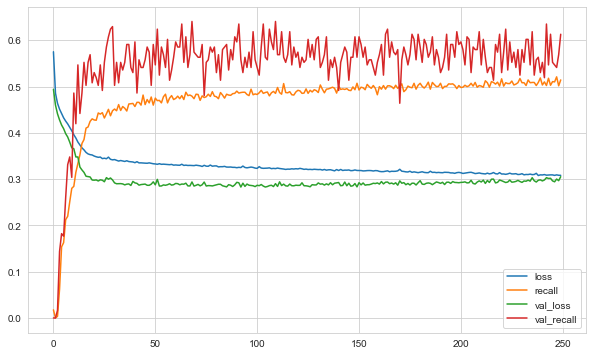

In [47]:
loss_df.plot()

In [48]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[743  53]
 [101 103]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       796
           1       0.66      0.50      0.57       204

    accuracy                           0.85      1000
   macro avg       0.77      0.72      0.74      1000
weighted avg       0.84      0.85      0.84      1000



In [49]:
loss, recall= model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.36410051584243774
recall :  0.5049019455909729


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 
***************
## Modeli Geliştirmek İçin Farklı Yöntemlerin Uygulanması

- "class_weight" parametresi ile model oluşturmada aşağıdaki yöntemleri uygulayın
- Her yöntem için model oluşturun ve değerlendirin

### Increase The Learning Rate and Observe The Results
**********
### Öğrenme Hızını Artırın ve Sonuçları Gözlemleyin

In [50]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.003)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [51]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 250, verbose=1)

Epoch 1/250
64/64 [==============================] - 1s 5ms/step - loss: 0.5183 - recall: 0.0073 - val_loss: 0.4551 - val_recall: 0.0000e+00
Epoch 2/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4595 - recall: 0.0515 - val_loss: 0.4314 - val_recall: 0.1823
Epoch 3/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4391 - recall: 0.1725 - val_loss: 0.4042 - val_recall: 0.3149
Epoch 4/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4208 - recall: 0.2385 - val_loss: 0.3842 - val_recall: 0.3481
Epoch 5/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4066 - recall: 0.2827 - val_loss: 0.3604 - val_recall: 0.2983
Epoch 6/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3876 - recall: 0.3257 - val_loss: 0.3307 - val_recall: 0.4309
Epoch 7/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3698 - recall: 0.3953 - val_loss: 0.3154 - val_recall: 0.4254
Epoch 8/250
64/64 [==================

64/64 [==============================] - 0s 2ms/step - loss: 0.3176 - recall: 0.4909 - val_loss: 0.2930 - val_recall: 0.5028
Epoch 61/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3167 - recall: 0.4788 - val_loss: 0.2918 - val_recall: 0.5691
Epoch 62/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3185 - recall: 0.4849 - val_loss: 0.2957 - val_recall: 0.5525
Epoch 63/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3161 - recall: 0.4903 - val_loss: 0.3022 - val_recall: 0.5249
Epoch 64/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3179 - recall: 0.4824 - val_loss: 0.2925 - val_recall: 0.5083
Epoch 65/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3154 - recall: 0.4812 - val_loss: 0.2966 - val_recall: 0.5304
Epoch 66/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3166 - recall: 0.4952 - val_loss: 0.2982 - val_recall: 0.5359
Epoch 67/250
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.2971 - recall: 0.5091 - val_loss: 0.2999 - val_recall: 0.5414
Epoch 120/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3017 - recall: 0.5000 - val_loss: 0.3018 - val_recall: 0.5635
Epoch 121/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2972 - recall: 0.5012 - val_loss: 0.3232 - val_recall: 0.5912
Epoch 122/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3041 - recall: 0.5145 - val_loss: 0.3041 - val_recall: 0.5083
Epoch 123/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2971 - recall: 0.5061 - val_loss: 0.3094 - val_recall: 0.5249
Epoch 124/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2969 - recall: 0.5085 - val_loss: 0.3063 - val_recall: 0.5470
Epoch 125/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2979 - recall: 0.5079 - val_loss: 0.3099 - val_recall: 0.5028
Epoch 126/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.2803 - recall: 0.5176 - val_loss: 0.3270 - val_recall: 0.5193
Epoch 179/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2825 - recall: 0.5206 - val_loss: 0.3342 - val_recall: 0.4807
Epoch 180/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2808 - recall: 0.5206 - val_loss: 0.3286 - val_recall: 0.6022
Epoch 181/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2811 - recall: 0.5254 - val_loss: 0.3388 - val_recall: 0.5635
Epoch 182/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2843 - recall: 0.5188 - val_loss: 0.3196 - val_recall: 0.4862
Epoch 183/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2833 - recall: 0.5206 - val_loss: 0.3254 - val_recall: 0.5746
Epoch 184/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2803 - recall: 0.5206 - val_loss: 0.3311 - val_recall: 0.5580
Epoch 185/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.2700 - recall: 0.5387 - val_loss: 0.3580 - val_recall: 0.4530
Epoch 238/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2733 - recall: 0.5278 - val_loss: 0.3517 - val_recall: 0.5635
Epoch 239/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2686 - recall: 0.5369 - val_loss: 0.3566 - val_recall: 0.4862
Epoch 240/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2678 - recall: 0.5460 - val_loss: 0.3540 - val_recall: 0.4862
Epoch 241/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2676 - recall: 0.5424 - val_loss: 0.3588 - val_recall: 0.5249
Epoch 242/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2695 - recall: 0.5460 - val_loss: 0.3666 - val_recall: 0.4641
Epoch 243/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2759 - recall: 0.5369 - val_loss: 0.3545 - val_recall: 0.5801
Epoch 244/250
64/64 [====================

In [52]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

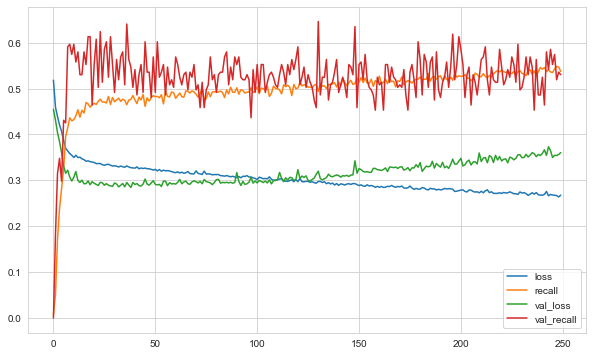

In [53]:
loss_df.plot()

In [54]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[745  51]
 [121  83]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       796
           1       0.62      0.41      0.49       204

    accuracy                           0.83      1000
   macro avg       0.74      0.67      0.69      1000
weighted avg       0.81      0.83      0.81      1000



In [55]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [56]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 250, verbose=1)

Epoch 1/250
64/64 [==============================] - 1s 5ms/step - loss: 0.4992 - recall: 0.0085 - val_loss: 0.4378 - val_recall: 0.0884
Epoch 2/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4459 - recall: 0.1483 - val_loss: 0.4075 - val_recall: 0.2928
Epoch 3/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4213 - recall: 0.2554 - val_loss: 0.3703 - val_recall: 0.3646
Epoch 4/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3873 - recall: 0.3341 - val_loss: 0.3255 - val_recall: 0.4530
Epoch 5/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3748 - recall: 0.3862 - val_loss: 0.3126 - val_recall: 0.4530
Epoch 6/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3594 - recall: 0.4140 - val_loss: 0.3065 - val_recall: 0.5304
Epoch 7/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3543 - recall: 0.4243 - val_loss: 0.3038 - val_recall: 0.4254
Epoch 8/250
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.3151 - recall: 0.5054 - val_loss: 0.3119 - val_recall: 0.5138
Epoch 61/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3127 - recall: 0.4939 - val_loss: 0.2956 - val_recall: 0.5359
Epoch 62/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3126 - recall: 0.4958 - val_loss: 0.3110 - val_recall: 0.5470
Epoch 63/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3106 - recall: 0.5067 - val_loss: 0.3222 - val_recall: 0.4917
Epoch 64/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3123 - recall: 0.5121 - val_loss: 0.3117 - val_recall: 0.4696
Epoch 65/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3098 - recall: 0.4867 - val_loss: 0.3054 - val_recall: 0.5249
Epoch 66/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3109 - recall: 0.5073 - val_loss: 0.3212 - val_recall: 0.5635
Epoch 67/250
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.2876 - recall: 0.5418 - val_loss: 0.3528 - val_recall: 0.5580
Epoch 120/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2901 - recall: 0.5375 - val_loss: 0.3496 - val_recall: 0.5138
Epoch 121/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2871 - recall: 0.5272 - val_loss: 0.3586 - val_recall: 0.5856
Epoch 122/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2914 - recall: 0.5472 - val_loss: 0.3602 - val_recall: 0.4475
Epoch 123/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2881 - recall: 0.5272 - val_loss: 0.3499 - val_recall: 0.5028
Epoch 124/250
64/64 [==============================] - 0s 3ms/step - loss: 0.2840 - recall: 0.5460 - val_loss: 0.3656 - val_recall: 0.5193
Epoch 125/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2830 - recall: 0.5393 - val_loss: 0.3583 - val_recall: 0.5083
Epoch 126/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.2755 - recall: 0.5611 - val_loss: 0.3647 - val_recall: 0.5359
Epoch 179/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2711 - recall: 0.5617 - val_loss: 0.3774 - val_recall: 0.5359
Epoch 180/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2727 - recall: 0.5605 - val_loss: 0.3787 - val_recall: 0.5635
Epoch 181/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2723 - recall: 0.5763 - val_loss: 0.3769 - val_recall: 0.5359
Epoch 182/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2763 - recall: 0.5569 - val_loss: 0.3653 - val_recall: 0.5193
Epoch 183/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2688 - recall: 0.5720 - val_loss: 0.3723 - val_recall: 0.5359
Epoch 184/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2694 - recall: 0.5751 - val_loss: 0.3799 - val_recall: 0.4751
Epoch 185/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.2606 - recall: 0.5908 - val_loss: 0.4279 - val_recall: 0.4862
Epoch 238/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2646 - recall: 0.5757 - val_loss: 0.4007 - val_recall: 0.5525
Epoch 239/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2610 - recall: 0.5799 - val_loss: 0.4089 - val_recall: 0.5856
Epoch 240/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2626 - recall: 0.5860 - val_loss: 0.4167 - val_recall: 0.5138
Epoch 241/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2589 - recall: 0.5908 - val_loss: 0.4168 - val_recall: 0.5249
Epoch 242/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2593 - recall: 0.5944 - val_loss: 0.4253 - val_recall: 0.4475
Epoch 243/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2618 - recall: 0.5835 - val_loss: 0.4224 - val_recall: 0.5635
Epoch 244/250
64/64 [====================

In [57]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

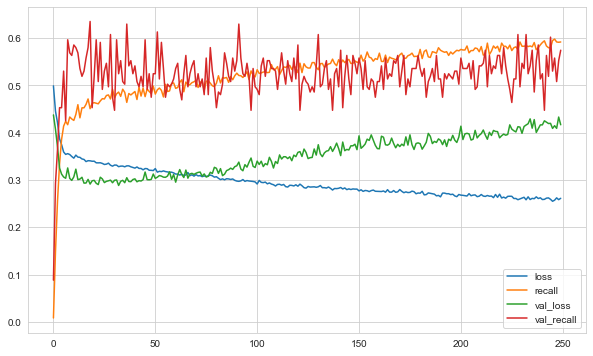

In [58]:
loss_df.plot()

In [59]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[732  64]
 [102 102]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       796
           1       0.61      0.50      0.55       204

    accuracy                           0.83      1000
   macro avg       0.75      0.71      0.72      1000
weighted avg       0.82      0.83      0.83      1000



In [60]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [61]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 250, verbose=1)

Epoch 1/250
64/64 [==============================] - 1s 5ms/step - loss: 0.4858 - recall: 0.0048 - val_loss: 0.4287 - val_recall: 0.0276
Epoch 2/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4382 - recall: 0.2082 - val_loss: 0.3966 - val_recall: 0.3204
Epoch 3/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4097 - recall: 0.3021 - val_loss: 0.3510 - val_recall: 0.3978
Epoch 4/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3829 - recall: 0.3547 - val_loss: 0.3271 - val_recall: 0.4199
Epoch 5/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3792 - recall: 0.3705 - val_loss: 0.3452 - val_recall: 0.3039
Epoch 6/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3630 - recall: 0.3898 - val_loss: 0.3107 - val_recall: 0.5193
Epoch 7/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3568 - recall: 0.4013 - val_loss: 0.3074 - val_recall: 0.4917
Epoch 8/250
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.3129 - recall: 0.5000 - val_loss: 0.3293 - val_recall: 0.4807
Epoch 61/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3120 - recall: 0.4764 - val_loss: 0.3088 - val_recall: 0.5470
Epoch 62/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3109 - recall: 0.4939 - val_loss: 0.3079 - val_recall: 0.5470
Epoch 63/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3109 - recall: 0.4855 - val_loss: 0.3238 - val_recall: 0.4807
Epoch 64/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3114 - recall: 0.4915 - val_loss: 0.3223 - val_recall: 0.4751
Epoch 65/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3108 - recall: 0.4824 - val_loss: 0.3081 - val_recall: 0.5083
Epoch 66/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3098 - recall: 0.4909 - val_loss: 0.3203 - val_recall: 0.5304
Epoch 67/250
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.2976 - recall: 0.4946 - val_loss: 0.3364 - val_recall: 0.4972
Epoch 120/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2908 - recall: 0.5012 - val_loss: 0.3391 - val_recall: 0.5359
Epoch 121/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2941 - recall: 0.5012 - val_loss: 0.3319 - val_recall: 0.5028
Epoch 122/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2887 - recall: 0.5012 - val_loss: 0.3497 - val_recall: 0.4586
Epoch 123/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2945 - recall: 0.4824 - val_loss: 0.3348 - val_recall: 0.4972
Epoch 124/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2908 - recall: 0.5000 - val_loss: 0.3346 - val_recall: 0.4420
Epoch 125/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2928 - recall: 0.4824 - val_loss: 0.3255 - val_recall: 0.5028
Epoch 126/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.2802 - recall: 0.5097 - val_loss: 0.3548 - val_recall: 0.5470
Epoch 179/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2731 - recall: 0.5012 - val_loss: 0.3670 - val_recall: 0.5359
Epoch 180/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2745 - recall: 0.5103 - val_loss: 0.3621 - val_recall: 0.5138
Epoch 181/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2723 - recall: 0.5073 - val_loss: 0.3786 - val_recall: 0.4972
Epoch 182/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2777 - recall: 0.5054 - val_loss: 0.3421 - val_recall: 0.4917
Epoch 183/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2771 - recall: 0.4988 - val_loss: 0.3495 - val_recall: 0.5304
Epoch 184/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2772 - recall: 0.4988 - val_loss: 0.3640 - val_recall: 0.5138
Epoch 185/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.2730 - recall: 0.4873 - val_loss: 0.3809 - val_recall: 0.5359
Epoch 238/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2680 - recall: 0.5061 - val_loss: 0.3950 - val_recall: 0.4862
Epoch 239/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2704 - recall: 0.5000 - val_loss: 0.3716 - val_recall: 0.4696
Epoch 240/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2702 - recall: 0.5030 - val_loss: 0.3782 - val_recall: 0.4972
Epoch 241/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2651 - recall: 0.5018 - val_loss: 0.4004 - val_recall: 0.4917
Epoch 242/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2672 - recall: 0.5067 - val_loss: 0.3844 - val_recall: 0.4972
Epoch 243/250
64/64 [==============================] - 0s 2ms/step - loss: 0.2714 - recall: 0.5048 - val_loss: 0.3858 - val_recall: 0.5138
Epoch 244/250
64/64 [====================

<AxesSubplot:>

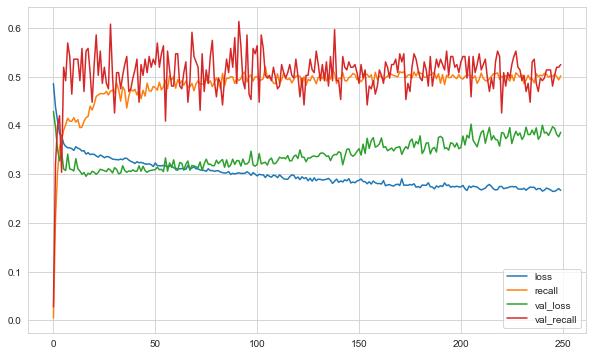

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [63]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[763  33]
 [122  82]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       796
           1       0.71      0.40      0.51       204

    accuracy                           0.84      1000
   macro avg       0.79      0.68      0.71      1000
weighted avg       0.83      0.84      0.83      1000



### Add Dropout Layer

In [64]:
from tensorflow.keras.layers import Dropout

In [65]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(18, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(9, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [66]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 250, verbose=1)

Epoch 1/250
64/64 [==============================] - 1s 5ms/step - loss: 0.5873 - recall: 0.0545 - val_loss: 0.4962 - val_recall: 0.0000e+00
Epoch 2/250
64/64 [==============================] - 0s 2ms/step - loss: 0.5118 - recall: 0.0024 - val_loss: 0.4728 - val_recall: 0.0000e+00
Epoch 3/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4909 - recall: 0.0000e+00 - val_loss: 0.4557 - val_recall: 0.0000e+00
Epoch 4/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4816 - recall: 0.0000e+00 - val_loss: 0.4461 - val_recall: 0.0000e+00
Epoch 5/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4794 - recall: 0.0079 - val_loss: 0.4417 - val_recall: 0.0000e+00
Epoch 6/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4704 - recall: 0.0115 - val_loss: 0.4324 - val_recall: 0.0000e+00
Epoch 7/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4637 - recall: 0.0369 - val_loss: 0.4273 - val_recall: 0.0829
Epoch 8/2

64/64 [==============================] - 0s 2ms/step - loss: 0.3630 - recall: 0.4189 - val_loss: 0.3038 - val_recall: 0.4807
Epoch 61/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3630 - recall: 0.4013 - val_loss: 0.3013 - val_recall: 0.4807
Epoch 62/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3579 - recall: 0.4080 - val_loss: 0.3067 - val_recall: 0.5138
Epoch 63/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3643 - recall: 0.3941 - val_loss: 0.3048 - val_recall: 0.4586
Epoch 64/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3617 - recall: 0.3898 - val_loss: 0.2995 - val_recall: 0.4972
Epoch 65/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3625 - recall: 0.4044 - val_loss: 0.3012 - val_recall: 0.4751
Epoch 66/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3601 - recall: 0.4007 - val_loss: 0.3027 - val_recall: 0.4862
Epoch 67/250
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3486 - recall: 0.4165 - val_loss: 0.2974 - val_recall: 0.5249
Epoch 120/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3501 - recall: 0.4110 - val_loss: 0.2966 - val_recall: 0.4862
Epoch 121/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3481 - recall: 0.4189 - val_loss: 0.2943 - val_recall: 0.4972
Epoch 122/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3443 - recall: 0.4292 - val_loss: 0.2938 - val_recall: 0.5249
Epoch 123/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3485 - recall: 0.4171 - val_loss: 0.2955 - val_recall: 0.5138
Epoch 124/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3429 - recall: 0.4189 - val_loss: 0.2934 - val_recall: 0.5028
Epoch 125/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3450 - recall: 0.4207 - val_loss: 0.2947 - val_recall: 0.5193
Epoch 126/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3401 - recall: 0.4231 - val_loss: 0.2934 - val_recall: 0.5083
Epoch 179/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3402 - recall: 0.4159 - val_loss: 0.2929 - val_recall: 0.5304
Epoch 180/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3412 - recall: 0.4286 - val_loss: 0.2957 - val_recall: 0.5138
Epoch 181/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3410 - recall: 0.4352 - val_loss: 0.2941 - val_recall: 0.4917
Epoch 182/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3383 - recall: 0.4443 - val_loss: 0.2973 - val_recall: 0.4807
Epoch 183/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3420 - recall: 0.4340 - val_loss: 0.2968 - val_recall: 0.4917
Epoch 184/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3385 - recall: 0.4225 - val_loss: 0.2939 - val_recall: 0.5083
Epoch 185/250
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3317 - recall: 0.4425 - val_loss: 0.2967 - val_recall: 0.4862
Epoch 238/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3365 - recall: 0.4280 - val_loss: 0.2944 - val_recall: 0.5249
Epoch 239/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3303 - recall: 0.4377 - val_loss: 0.2939 - val_recall: 0.5304
Epoch 240/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3352 - recall: 0.4389 - val_loss: 0.2984 - val_recall: 0.5083
Epoch 241/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3315 - recall: 0.4504 - val_loss: 0.2941 - val_recall: 0.5249
Epoch 242/250
64/64 [==============================] - 0s 2ms/step - loss: 0.3351 - recall: 0.4274 - val_loss: 0.2921 - val_recall: 0.5249
Epoch 243/250
64/64 [==============================] - 0s 3ms/step - loss: 0.3363 - recall: 0.4286 - val_loss: 0.2951 - val_recall: 0.5193
Epoch 244/250
64/64 [====================

<AxesSubplot:>

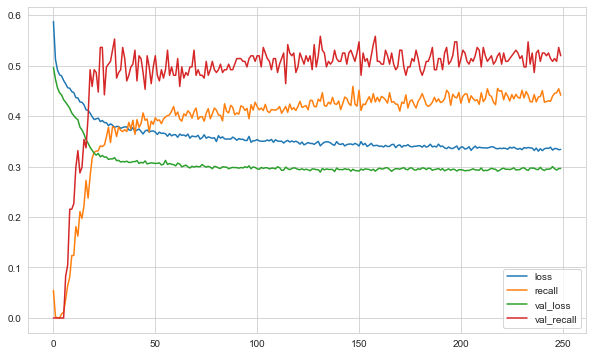

In [67]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [68]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[773  23]
 [118  86]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.79      0.42      0.55       204

    accuracy                           0.86      1000
   macro avg       0.83      0.70      0.73      1000
weighted avg       0.85      0.86      0.84      1000



### Add Early Stop

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

#### Monitor the "val_loss" as metric

In [70]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(18, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(9, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [71]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [72]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 250, verbose = 1,
          callbacks = [early_stop], class_weight=class_weights)

Epoch 1/250
64/64 [==============================] - 1s 5ms/step - loss: 0.6917 - recall: 0.4824 - val_loss: 0.6799 - val_recall: 0.5691
Epoch 2/250
64/64 [==============================] - 0s 3ms/step - loss: 0.6760 - recall: 0.5672 - val_loss: 0.6471 - val_recall: 0.7017
Epoch 3/250
64/64 [==============================] - 0s 2ms/step - loss: 0.6460 - recall: 0.6265 - val_loss: 0.5965 - val_recall: 0.6464
Epoch 4/250
64/64 [==============================] - 0s 3ms/step - loss: 0.6346 - recall: 0.6501 - val_loss: 0.5731 - val_recall: 0.6298
Epoch 5/250
64/64 [==============================] - 0s 2ms/step - loss: 0.6327 - recall: 0.6301 - val_loss: 0.6093 - val_recall: 0.7624
Epoch 6/250
64/64 [==============================] - 0s 2ms/step - loss: 0.6180 - recall: 0.6677 - val_loss: 0.5575 - val_recall: 0.6796
Epoch 7/250
64/64 [==============================] - 0s 2ms/step - loss: 0.6095 - recall: 0.6574 - val_loss: 0.5823 - val_recall: 0.7680
Epoch 8/250
64/64 [======================

Epoch 59: early stopping


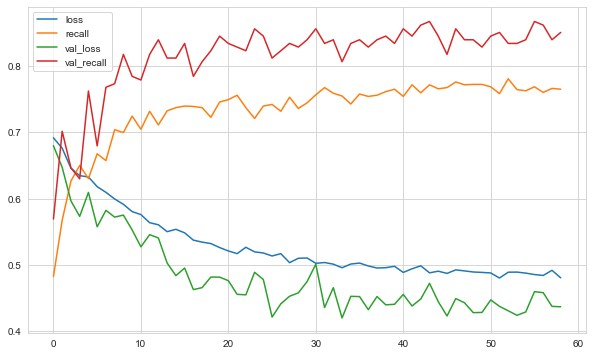

In [73]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [74]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[626 170]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.73      0.57       204

    accuracy                           0.77      1000
   macro avg       0.69      0.76      0.71      1000
weighted avg       0.83      0.77      0.79      1000



#### Monitor the "val_recall" as metric

In [75]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(18, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(9, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [76]:
early_stop = EarlyStopping(monitor='val_recall', mode='max', verbose=1, patience=25, restore_best_weights=True)

In [77]:
model.fit(x=X_train, y=y_train, 
          validation_split=0.1, 
          batch_size=128, epochs=250, 
          verbose=1, callbacks=[early_stop], 
          class_weight=class_weights)

Epoch 1/250
64/64 [==============================] - 1s 5ms/step - loss: 0.6917 - recall: 0.4824 - val_loss: 0.6799 - val_recall: 0.5691
Epoch 2/250
64/64 [==============================] - 0s 3ms/step - loss: 0.6760 - recall: 0.5672 - val_loss: 0.6471 - val_recall: 0.7017
Epoch 3/250
64/64 [==============================] - 0s 2ms/step - loss: 0.6460 - recall: 0.6265 - val_loss: 0.5965 - val_recall: 0.6464
Epoch 4/250
64/64 [==============================] - 0s 2ms/step - loss: 0.6346 - recall: 0.6501 - val_loss: 0.5731 - val_recall: 0.6298
Epoch 5/250
64/64 [==============================] - 0s 2ms/step - loss: 0.6327 - recall: 0.6301 - val_loss: 0.6093 - val_recall: 0.7624
Epoch 6/250
64/64 [==============================] - 0s 2ms/step - loss: 0.6180 - recall: 0.6677 - val_loss: 0.5575 - val_recall: 0.6796
Epoch 7/250
64/64 [==============================] - 0s 2ms/step - loss: 0.6095 - recall: 0.6574 - val_loss: 0.5823 - val_recall: 0.7680
Epoch 8/250
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4868 - recall: 0.7772 - val_loss: 0.4372 - val_recall: 0.8398
Epoch 61/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4872 - recall: 0.7663 - val_loss: 0.4162 - val_recall: 0.8287
Epoch 62/250
64/64 [==============================] - 0s 3ms/step - loss: 0.4810 - recall: 0.7627 - val_loss: 0.4901 - val_recall: 0.8840
Epoch 63/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4917 - recall: 0.7754 - val_loss: 0.4326 - val_recall: 0.8398
Epoch 64/250
64/64 [==============================] - 0s 3ms/step - loss: 0.4846 - recall: 0.7688 - val_loss: 0.4405 - val_recall: 0.8453
Epoch 65/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4861 - recall: 0.7718 - val_loss: 0.4130 - val_recall: 0.7956
Epoch 66/250
64/64 [==============================] - 0s 2ms/step - loss: 0.4786 - recall: 0.7669 - val_loss: 0.4447 - val_recall: 0.8508
Epoch 67/250
64/64 [===========================

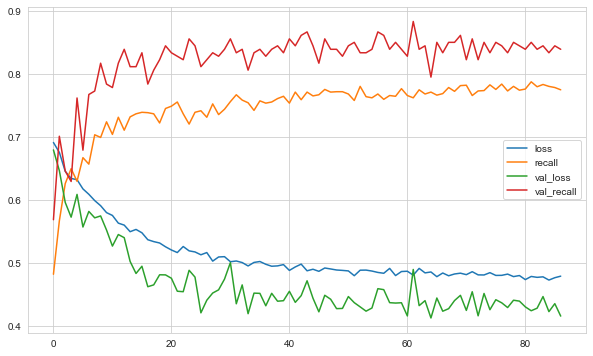

In [78]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [79]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[550 246]
 [ 39 165]]
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       796
           1       0.40      0.81      0.54       204

    accuracy                           0.71      1000
   macro avg       0.67      0.75      0.67      1000
weighted avg       0.83      0.71      0.74      1000



## GridSearchCV

In [80]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [81]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [82]:
early_stop = EarlyStopping(monitor='val_recall', mode='max', verbose=1, patience=25, restore_best_weights=True)

In [83]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 250)

parameters = {'batch_size': [128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/250
32/32 [==============================] - 1s 9ms/step - loss: 0.6497 - recall: 0.6392 - val_loss: 0.5927 - val_recall: 0.7017
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6062 - recall: 0.6840 - val_loss: 0.6063 - val_recall: 0.7845
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.5835 - recall: 0.7016 - val_loss: 0.5474 - val_recall: 0.7459
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.5690 - recall: 0.7173 - val_loss: 0.4603 - val_recall: 0.6243
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.5499 - recall: 0.7173 - val_loss: 0.4192 - val_recall: 0.5967
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.5337 - recall: 0.7403 - val_loss: 0.4602 - val_recall: 0.7348
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.5233 - recall: 0.7470 - val_loss: 0.4128 

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000210DE59B880>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model
**************
### Modeli Değerlendirin

- Metriklerin değişimini gözlemlemek için model geçmişini çizin
- "Karışıklık matrisi" ve "sınıflandırma raporunu" görmek için tahmin yapın
- Model için ROC (Alıcı Çalışma Eğrisi) ve AUC'yi (Eğri Altındaki Alan) kontrol edin

In [84]:
grid_model.best_score_

0.904790659173598

In [85]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [86]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
21,0.905,0.038,1,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
17,0.902,0.030,2,"{'batch_size': 256, 'learn_rate': 0.003, 'opti..."
19,0.894,0.030,3,"{'batch_size': 256, 'learn_rate': 0.003, 'opti..."
23,0.894,0.014,4,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
11,0.870,0.027,5,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
5,0.866,0.020,6,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
9,0.865,0.014,7,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
16,0.856,0.032,8,"{'batch_size': 256, 'learn_rate': 0.003, 'opti..."
8,0.854,0.035,9,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
20,0.853,0.026,10,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."


In [87]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[444 352]
 [ 20 184]]
              precision    recall  f1-score   support

           0       0.96      0.56      0.70       796
           1       0.34      0.90      0.50       204

    accuracy                           0.63      1000
   macro avg       0.65      0.73      0.60      1000
weighted avg       0.83      0.63      0.66      1000



32/32 [==============================] - 0s 1ms/step


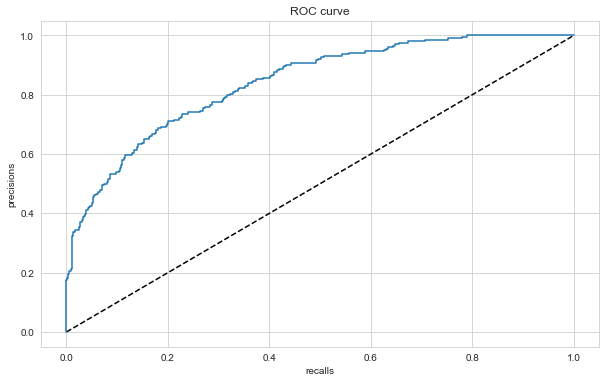

In [88]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precisions, recalls, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('ROC curve')
plt.show()

In [89]:
roc_auc_score(y_test, y_pred_proba)

0.8405261602128289

# Final Model and Model Deployment

In [112]:
import pickle
pickle.dump(scaler, open("scaler_Exited", 'wb'))

In [113]:
tf.random.set_seed(seed)
final_model = Sequential()

final_model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
final_model.add(Dense(18, activation = "relu"))
final_model.add(Dense(9, activation = "relu"))
final_model.add(Dense(1, activation = "sigmoid"))
opt = RMSprop(lr=0.005)
final_model.compile(optimizer=opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [114]:
early_stop = EarlyStopping(monitor='val_recall', mode='max', verbose=1, patience=25, restore_best_weights=True)

In [115]:
final_model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 256, epochs = 250, verbose = 1, callbacks = [early_stop], class_weight = class_weights)

Epoch 1/250
36/36 [==============================] - 1s 6ms/step - loss: 0.6440 - recall: 0.5843 - val_loss: 0.5674 - val_recall: 0.5539
Epoch 2/250
36/36 [==============================] - 0s 2ms/step - loss: 0.6045 - recall: 0.6727 - val_loss: 0.5301 - val_recall: 0.5686
Epoch 3/250
36/36 [==============================] - 0s 2ms/step - loss: 0.5834 - recall: 0.6918 - val_loss: 0.5574 - val_recall: 0.6667
Epoch 4/250
36/36 [==============================] - 0s 2ms/step - loss: 0.5569 - recall: 0.7027 - val_loss: 0.5558 - val_recall: 0.7206
Epoch 5/250
36/36 [==============================] - 0s 2ms/step - loss: 0.5409 - recall: 0.7109 - val_loss: 0.4690 - val_recall: 0.6176
Epoch 6/250
36/36 [==============================] - 0s 3ms/step - loss: 0.5196 - recall: 0.7289 - val_loss: 0.4688 - val_recall: 0.6667
Epoch 7/250
36/36 [==============================] - 0s 2ms/step - loss: 0.5097 - recall: 0.7398 - val_loss: 0.4237 - val_recall: 0.6029
Epoch 8/250
36/36 [======================

<AxesSubplot:>

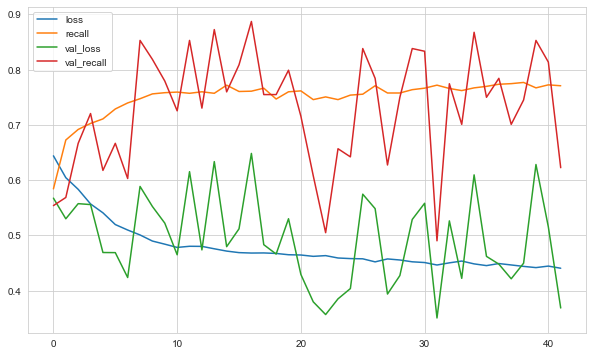

In [116]:
loss_df = pd.DataFrame(final_model.history.history)
loss_df.plot()

In [117]:
loss, accuracy = final_model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.6483848094940186
recall :  0.5049019455909729


In [118]:
y_pred = final_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[458 338]
 [ 23 181]]
              precision    recall  f1-score   support

           0       0.95      0.58      0.72       796
           1       0.35      0.89      0.50       204

    accuracy                           0.64      1000
   macro avg       0.65      0.73      0.61      1000
weighted avg       0.83      0.64      0.67      1000



In [119]:
final_model.save('model_Exited.h5')

#### Loading Model and Scaler - Modeli Yükleme ve Ölçekleme

In [120]:
from tensorflow.keras.models import load_model

In [121]:
model_Exited = load_model('model_Exited.h5')
scaler_Exited = pickle.load(open("scaler_Exited", "rb"))

### Prediction


In [122]:
single_Exited = df.drop('Exited', axis = 1).iloc[0:1, :]
single_Exited

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,0,0,0


In [123]:
single_Exited = scaler_Exited.transform(single_Exited)
single_Exited

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [124]:
(model_Exited.predict(single_Exited) > 0.5).astype("int32")

1/1 [==============================] - 0s 50ms/step


array([[1]])

In [125]:
df["Exited"].iloc[0]

1

#### First Ten Prediction

In [126]:
first_ten_Exited= df.drop('Exited', axis = 1).iloc[0:10, :]
first_ten_Exited

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,1,0
5,645,44,8,113755.780,2,1,0,149756.710,0,1,1
6,822,50,7,0.000,2,1,1,10062.800,0,0,1
7,376,29,4,115046.740,4,1,0,119346.880,1,0,0
8,501,44,4,142051.070,2,0,1,74940.500,0,0,1
9,684,27,2,134603.880,1,1,1,71725.730,0,0,1


In [127]:
first_ten_Exited = scaler_Exited.transform(first_ten)
first_ten_Exited

array([[-6.98924000e-01, -2.38860482e-01,  2.00000000e-02,
         0.00000000e+00, -3.33333333e-01,  1.00000000e+00,
         1.00000000e+00, -5.53716135e-05,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-6.98968000e-01, -2.39043097e-01,  1.00000000e-02,
         1.47474718e-06, -3.33333333e-01,  0.00000000e+00,
         1.00000000e+00, -5.50917176e-05,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [-6.99392000e-01, -2.38860482e-01,  8.00000000e-02,
         2.80951351e-06, -1.11111111e-01,  1.00000000e+00,
         0.00000000e+00, -5.50569862e-05,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-6.98604000e-01, -2.39408327e-01,  1.00000000e-02,
         0.00000000e+00, -2.22222222e-01,  0.00000000e+00,
         0.00000000e+00, -5.55597057e-05,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-6.98000000e-01, -2.38677867e-01,  2.00000000e-02,
         2.20858435e-06, -3.33333333e-01,  1.00000000e+00,
  

In [128]:
(model_Exited.predict(first_ten) > 0.5).astype("int32")

1/1 [==============================] - 0s 15ms/step


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [129]:
df['Exited'].iloc[0:10]

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

## Comparison with ML

#### Logistic Regression


In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_test_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[764  32]
 [167  37]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       796
           1       0.54      0.18      0.27       204

    accuracy                           0.80      1000
   macro avg       0.68      0.57      0.58      1000
weighted avg       0.76      0.80      0.76      1000



#### Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[759  37]
 [114  90]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.71      0.44      0.54       204

    accuracy                           0.85      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.85      0.83      1000

